In [1]:
#python library
import math, time, random, datetime


#Data Manipulation
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# missingno
import missingno

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the data
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
          'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
          'hours-per-week', 'native-country', 'predclass']

training_raw = pd.read_csv('datasets/adult.data',
                          header = None,
                          names = headers,
                          sep = ',\s',
                          na_values = ["?"],
                          engine = "python"
                          )
test_raw = pd.read_csv('datasets/adult.test',
                          header = None,
                          names = headers,
                          sep = ',\s',
                          na_values = ["?"],
                          skiprows = 1,
                          engine = "python"
                          )

In [3]:
# join the dataset
dataset_raw = training_raw.append(test_raw)

dataset_raw.reset_index(inplace = True)

dataset_raw.drop('index', inplace = True, axis = 1)

In [4]:
dataset_raw.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,predclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
dataset_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education-num     48842 non-null int64
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
predclass         48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
dataset_raw.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
dataset_raw.describe(include=['O'])

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,predclass
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


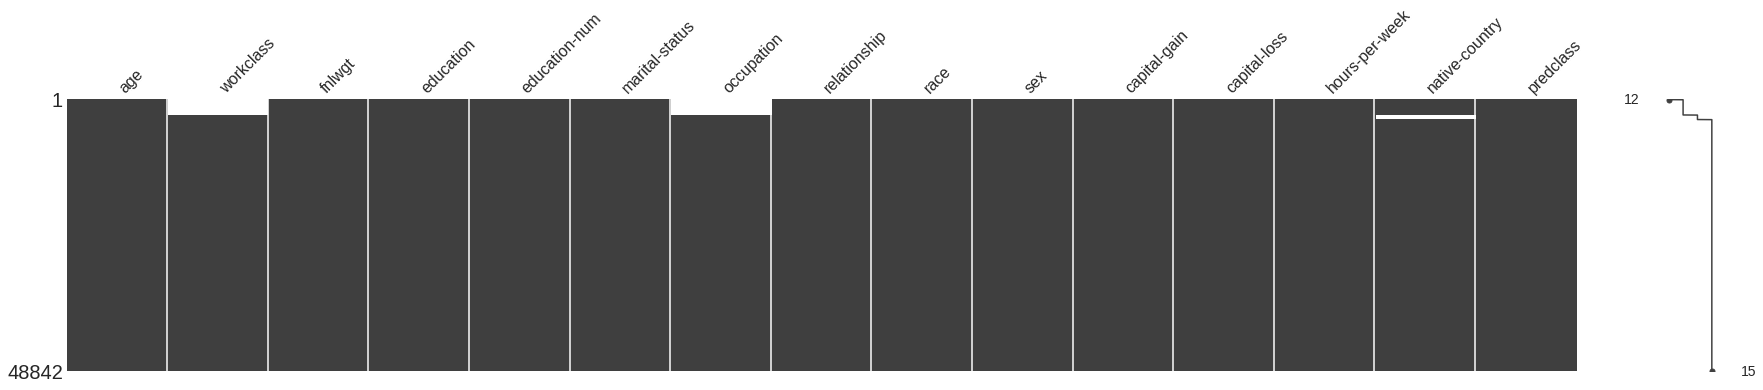

In [8]:
# how many missing values are there in our dataset 
missingno.matrix(dataset_raw, sort = 'ascending', figsize = (30,5));

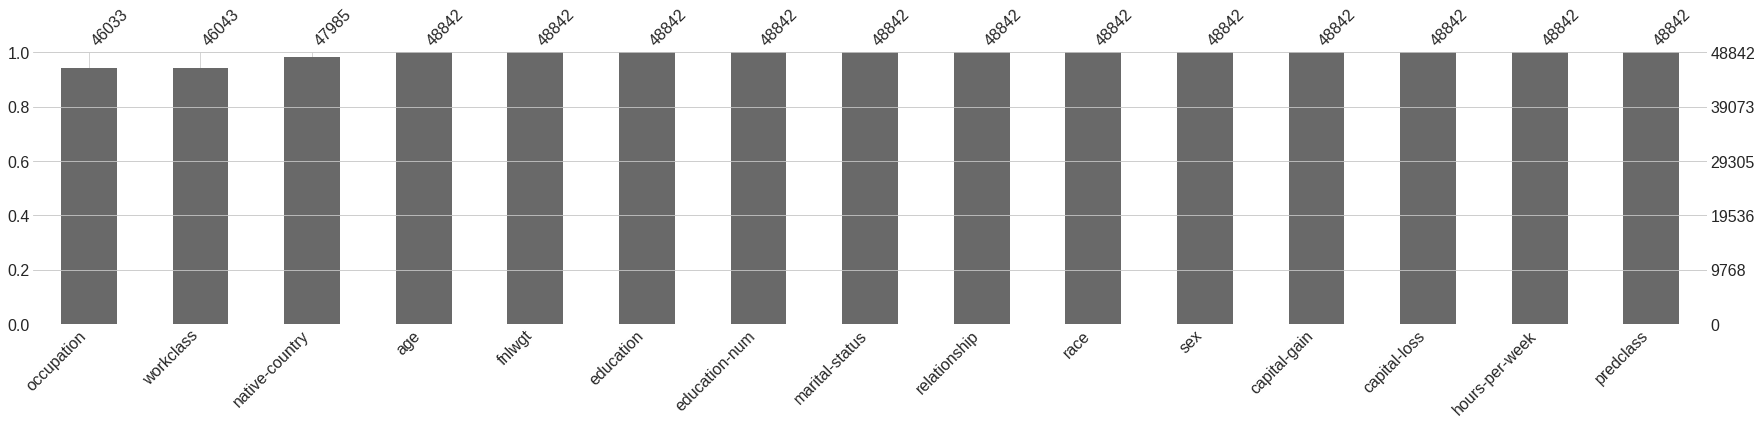

In [9]:
missingno.bar(dataset_raw, sort = 'ascending', figsize = (30,5));

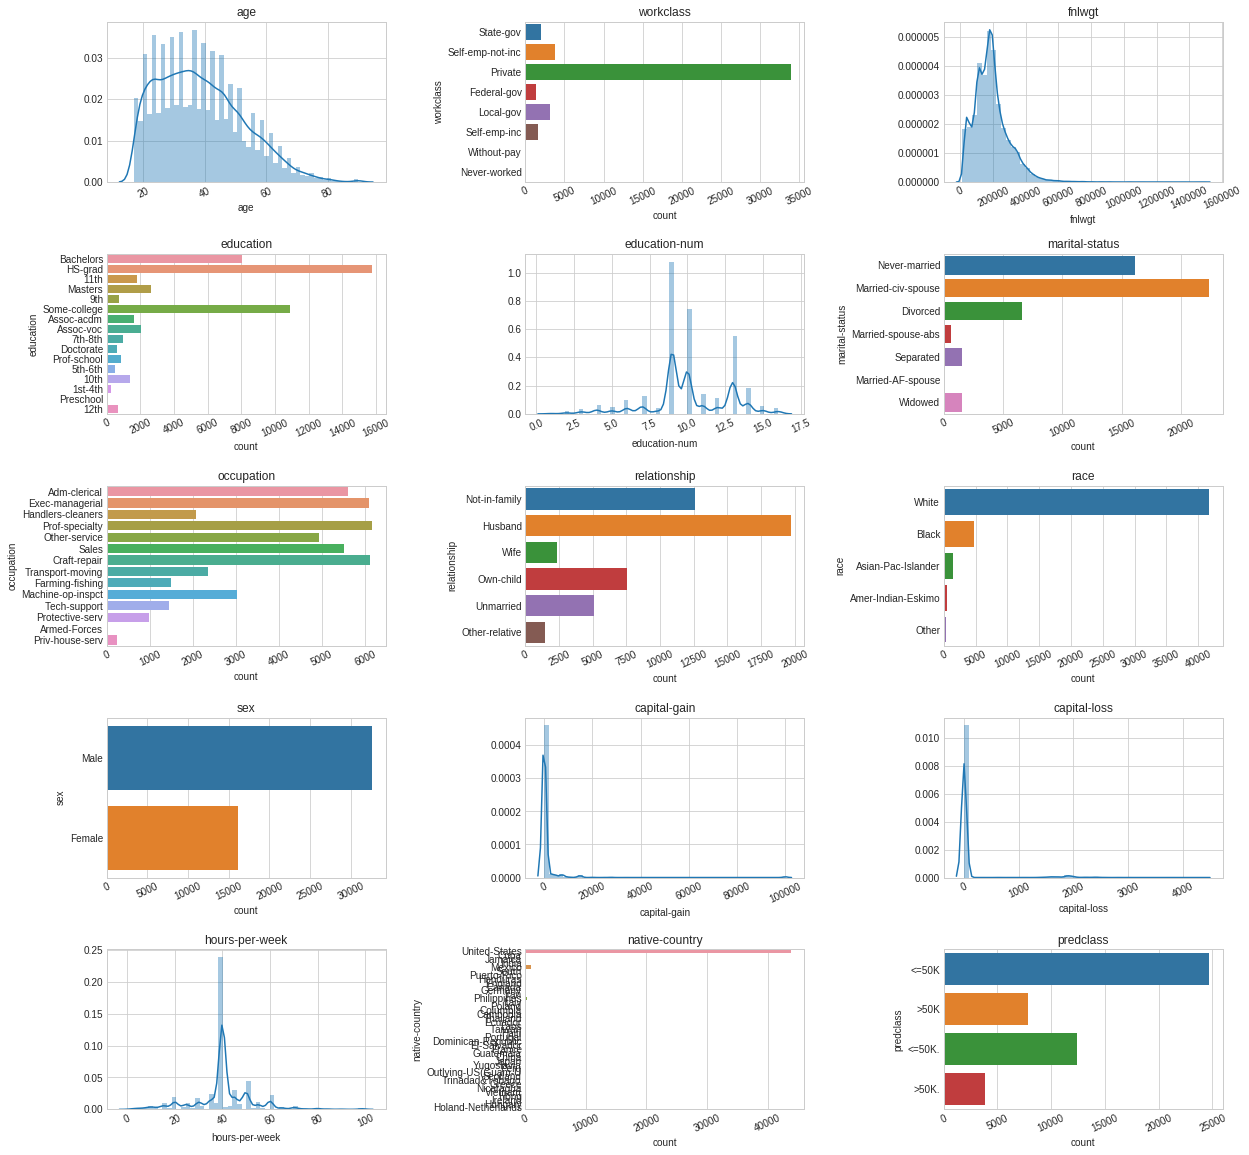

In [10]:
# plot the distribution of each feature
def plot_distribution(dataset, cols = 5, width = 20, height = 15, hspace= 0.2, wspace = 0.5):
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left = None, 
                        bottom = None, 
                        right = None, 
                        top = None, 
                        wspace = wspace, 
                        hspace = hspace)
    rows = math.ceil(float(dataset.shape[1])/cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels = substrings)
            plt.xticks(rotation = 25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation = 25)
            
plot_distribution(dataset_raw, cols=3, width =20, height = 20, hspace = 0.45, wspace = 0.5)

In [11]:
# to perform our data analysis let's create new dataframe
dataset_bin = pd.DataFrame()
dataset_con = pd.DataFrame()

Univariate Analysis

In [12]:
#Feature predclass: we'll change the string to a binary 0/1 with signifying over $50k
dataset_raw.loc[dataset_raw['predclass'] == '>50K', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == '>50K.', 'predclass'] = 1
dataset_raw.loc[dataset_raw['predclass'] == '<=50K', 'predclass'] = 0
dataset_raw.loc[dataset_raw['predclass'] == '<=50K.', 'predclass'] = 0

dataset_bin['predclass'] = dataset_raw['predclass']
dataset_con['predclass'] = dataset_raw['predclass']

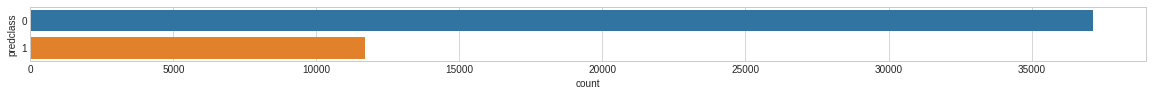

In [13]:
fig = plt.figure(figsize=(20,1))
sns.countplot(y='predclass', data = dataset_bin);

Feature age: Use pandas cut function to bin the data in equally sized buckets.

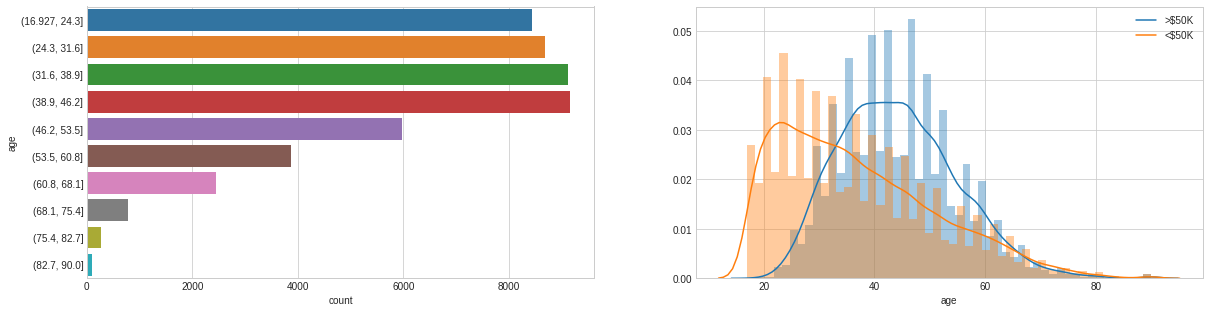

In [14]:
# discretised
dataset_bin['age'] = pd.cut(dataset_raw['age'], 10)
# non-discretised
dataset_con['age'] = dataset_raw['age']

fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.countplot(y = 'age', data = dataset_bin);
plt.subplot(1,2,2)
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 1]['age'], kde_kws = {"label": ">$50K"});
sns.distplot(dataset_con.loc[dataset_con['predclass'] == 0]['age'], kde_kws = {"label": "<$50K"});

# Feature workclass

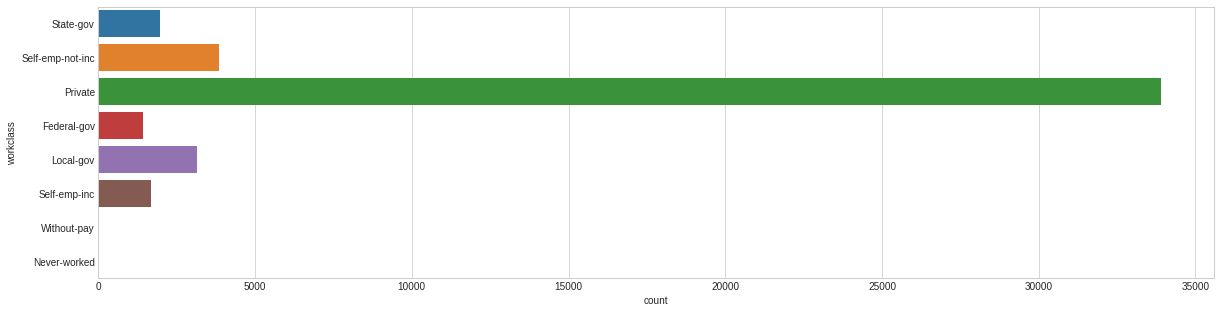

In [15]:
# can we bucket some to these groups?
plt.figure(figsize=(20,5))
sns.countplot(y="workclass", data = dataset_raw);

In [16]:
# there're too many groups here, we can group some of them together
dataset_raw.loc[dataset_raw['workclass'] == "Without-pay", "workclass"] = "Not Working"
dataset_raw.loc[dataset_raw['workclass'] == "Never-worked", "workclass"] = "Not Working"
dataset_raw.loc[dataset_raw['workclass'] == "Self-emp-inc", "workclass"] = "Self-emp"
dataset_raw.loc[dataset_raw['workclass'] == "Self-emp-not-inc", "workclass"] = "Self-emp"
dataset_raw.loc[dataset_raw['workclass'] == "Local-gov", "workclass"] = "Non-fed-gov"
dataset_raw.loc[dataset_raw['workclass'] == "State-gov", "workclass"] = "Non-fed-gov"
dataset_raw.loc[dataset_raw['workclass'] == "Federal-gov", "workclass"] = "Fed-gov"

dataset_bin['workclass'] = dataset_raw['workclass']
dataset_con['workclass'] = dataset_raw['workclass']

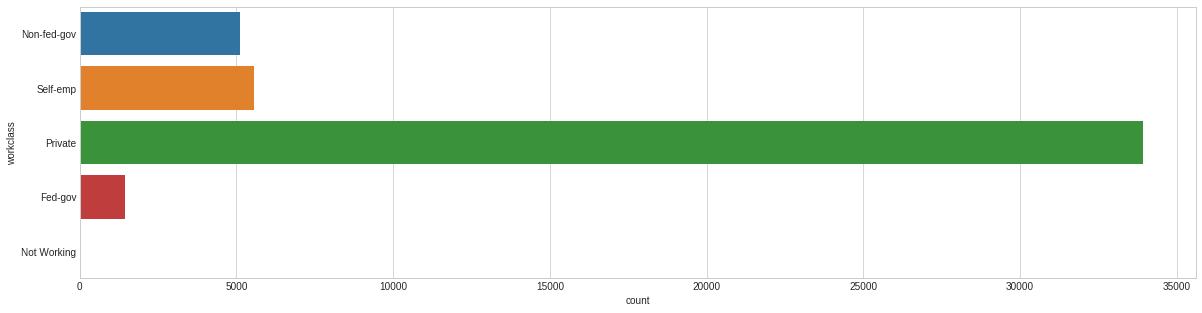

In [17]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y = "workclass", data = dataset_bin);

# Feature Occupation

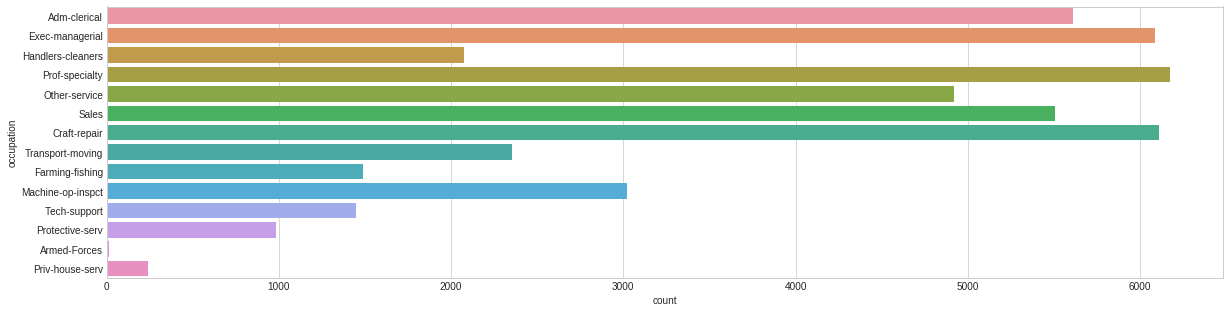

In [18]:
# can we bucket some of these groups?
plt.figure(figsize=(20,5))
sns.countplot(y = "occupation", data = dataset_raw);

In [19]:
dataset_raw.loc[dataset_raw['occupation'] == 'Adm-clerical', 'occupation'] = 'Admin'
dataset_raw.loc[dataset_raw['occupation'] == 'Exec-managerial', 'occupation'] = 'Office-labor'
dataset_raw.loc[dataset_raw['occupation'] == 'Tech-support', 'occupation'] = 'Office-labor'
dataset_raw.loc[dataset_raw['occupation'] == 'Sales', 'occupation'] = 'Office-labor'
dataset_raw.loc[dataset_raw['occupation'] == 'Handlers-cleaners', 'occupation'] = 'Manual-labor'
dataset_raw.loc[dataset_raw['occupation'] == 'Craft-repair', 'occupation'] = 'Manual-labor'
dataset_raw.loc[dataset_raw['occupation'] == 'Transport-moving', 'occupation'] = 'Manual-labor'
dataset_raw.loc[dataset_raw['occupation'] == 'Farming-fishing', 'occupation'] = 'Manual-labor'
dataset_raw.loc[dataset_raw['occupation'] == 'Machine-op-inspct', 'occupation'] = 'Manual-labor'
dataset_raw.loc[dataset_raw['occupation'] == 'Protective-serv', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Armed-Forces', 'occupation'] = 'Military'
dataset_raw.loc[dataset_raw['occupation'] == 'Priv-house-serv', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Other-service', 'occupation'] = 'Service'
dataset_raw.loc[dataset_raw['occupation'] == 'Prof-specialty', 'occupation'] = 'Professor'


dataset_bin['occupation'] = dataset_raw['occupation']
dataset_con['occupation'] = dataset_raw['occupation']

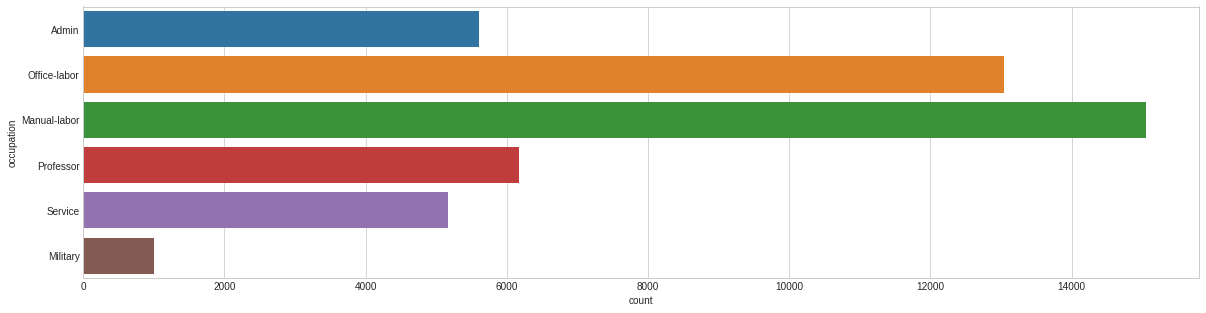

In [20]:
fig = plt.figure(figsize = (20,5))
sns.countplot(y = 'occupation', data = dataset_bin);

# Feature: native-country

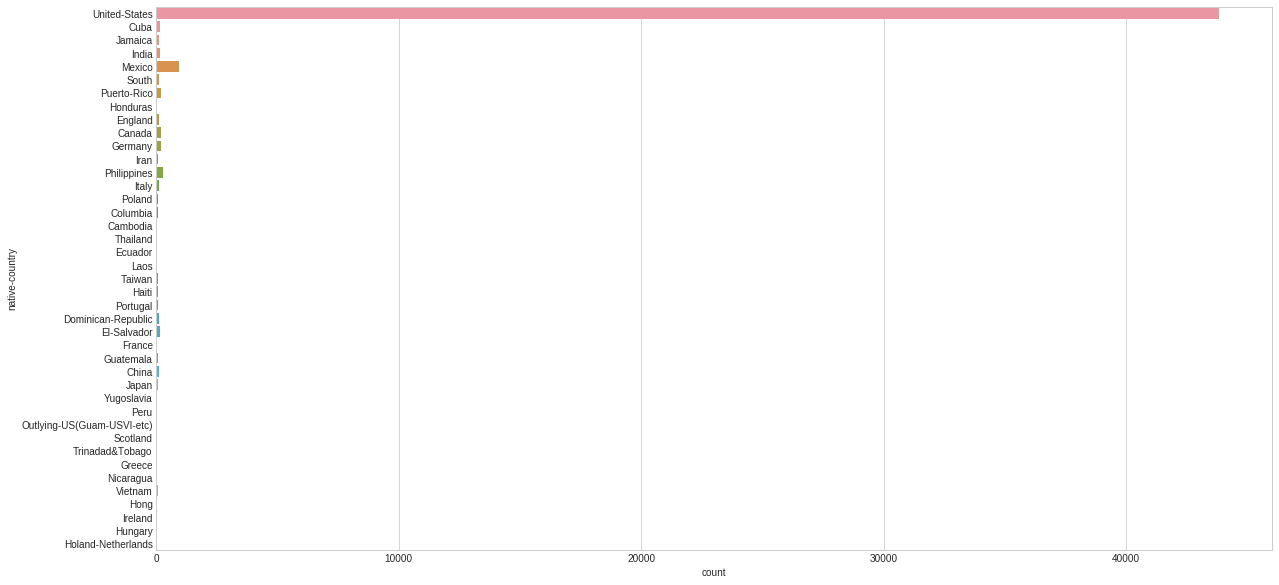

In [21]:
fig = plt.figure(figsize = (20,10))
sns.countplot(y="native-country", data = dataset_raw);

In [34]:
dataset_raw.loc[dataset_raw['native-country'] == 'Cuba', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Jamaica', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Mexico', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Puerto-Rico', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Honduras', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Ecuador', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Nicaragua', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Trinadad&Tobago', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Outlying-US(Guam-USVI-etc)', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Peru', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Guatemala', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Dominican-Republic', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Columbia', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Cuba', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'El-Salvador', 'native-country'] = 'Latin-A'
dataset_raw.loc[dataset_raw['native-country'] == 'Haiti', 'native-country'] = 'Latin-A'

dataset_raw.loc[dataset_raw['native-country'] == 'Canada', 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'England', 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'India', 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Ireland', 'native-country'] = 'British-Commonwealth'
dataset_raw.loc[dataset_raw['native-country'] == 'Scotland', 'native-country'] = 'British-Commonwealth'

dataset_raw.loc[dataset_raw['native-country'] == 'China', 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Hong', 'native-country'] = 'China'
dataset_raw.loc[dataset_raw['native-country'] == 'Taiwan', 'native-country'] = 'China'

dataset_raw.loc[dataset_raw['native-country'] == 'France', 'native-country'] = 'Euro-Group-1'
dataset_raw.loc[dataset_raw['native-country'] == 'Germany', 'native-country'] = 'Euro-Group-1'
dataset_raw.loc[dataset_raw['native-country'] == 'Holand-Netherlands', 'native-country'] = 'Euro-Group-1'
dataset_raw.loc[dataset_raw['native-country'] == 'Italy', 'native-country'] = 'Euro-Group-1'

dataset_raw.loc[dataset_raw['native-country'] == 'Greece', 'native-country'] = 'Euro-Group-2'
dataset_raw.loc[dataset_raw['native-country'] == 'Iran', 'native-country'] = 'Euro-Group-2'
dataset_raw.loc[dataset_raw['native-country'] == 'Poland', 'native-country'] = 'Euro-Group-2'
dataset_raw.loc[dataset_raw['native-country'] == 'Portugal', 'native-country'] = 'Euro-Group-2'
dataset_raw.loc[dataset_raw['native-country'] == 'South', 'native-country'] = 'Euro-Group-2'
dataset_raw.loc[dataset_raw['native-country'] == 'Yugoslavia', 'native-country'] = 'Euro-Group-2'
dataset_raw.loc[dataset_raw['native-country'] == 'Hungary', 'native-country'] = 'Euro-Group-2'

dataset_raw.loc[dataset_raw['native-country'] == 'Vietnam', 'native-country'] = 'South Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Laos', 'native-country'] = 'South Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Thailand', 'native-country'] = 'South Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Philippines', 'native-country'] = 'South Asia'
dataset_raw.loc[dataset_raw['native-country'] == 'Cambodia', 'native-country'] = 'South Asia'

dataset_raw.loc[dataset_raw['native-country'] == 'United States', 'native-country'] = 'United States'

dataset_raw.loc[dataset_raw['native-country'] == 'Japan', 'native-country'] = 'APAC'


dataset_bin['native-country'] = dataset_raw['native-country']
dataset_con['native-country'] = dataset_raw['native-country']


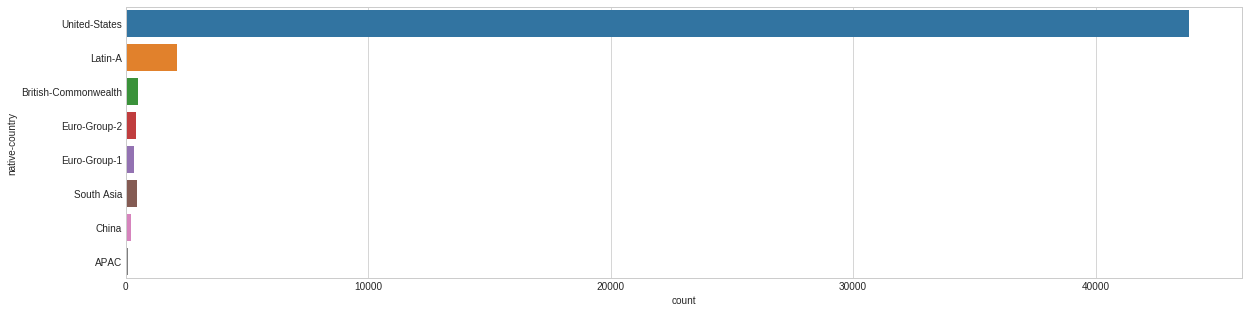

In [35]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y = "native-country", data = dataset_bin);

# Feature: Education

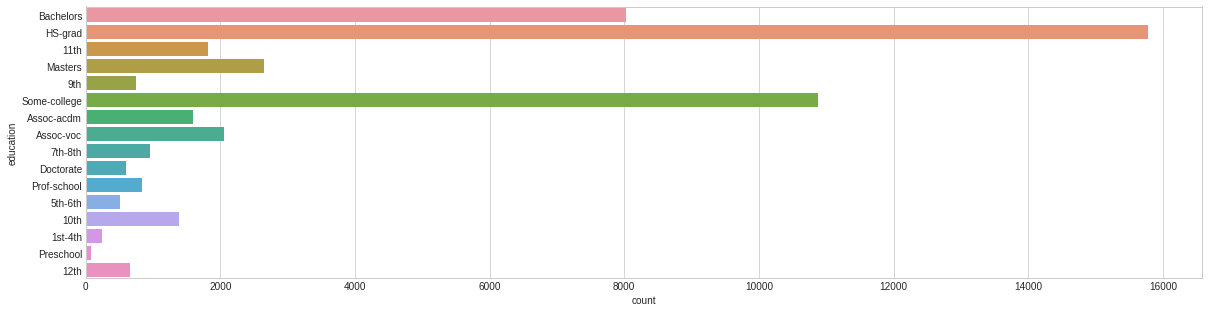

In [37]:
plt.figure(figsize = (20,5))
sns.countplot(y="education", data = dataset_raw);

In [38]:
dataset_raw.loc[dataset_raw['education'] == '12th', 'education'] = "Dropout"
dataset_raw.loc[dataset_raw['education'] == 'Preschool', 'education'] = "Dropout"
dataset_raw.loc[dataset_raw['education'] == '1st-4th', 'education'] = "Dropout"
dataset_raw.loc[dataset_raw['education'] == '10th', 'education'] = "Dropout"
dataset_raw.loc[dataset_raw['education'] == '5th-6th', 'education'] = "Dropout"
dataset_raw.loc[dataset_raw['education'] == '7th-8th', 'education'] = "Dropout"
dataset_raw.loc[dataset_raw['education'] == '9th', 'education'] = "Dropout"
dataset_raw.loc[dataset_raw['education'] == '11th', 'education'] = "Dropout"

dataset_raw.loc[dataset_raw['education'] == 'prof-school', 'education'] = "Professor"

dataset_raw.loc[dataset_raw['education'] == 'Doctorate', 'education'] = "Doctorate"

dataset_raw.loc[dataset_raw['education'] == 'Assoc-voc', 'education'] = "Associate"
dataset_raw.loc[dataset_raw['education'] == 'Assoc-acdm', 'education'] = "Associate"

dataset_raw.loc[dataset_raw['education'] == 'Some-college', 'education'] = "HS grade"
dataset_raw.loc[dataset_raw['education'] == 'HS-grad', 'education'] = "HS grade"

dataset_raw.loc[dataset_raw['education'] == 'Masters', 'education'] = "Masters"

dataset_raw.loc[dataset_raw['education'] == 'Bachelors', 'education'] = "Bachelors"

dataset_bin['education'] = dataset_raw['education']
dataset_con['education'] = dataset_raw['education']

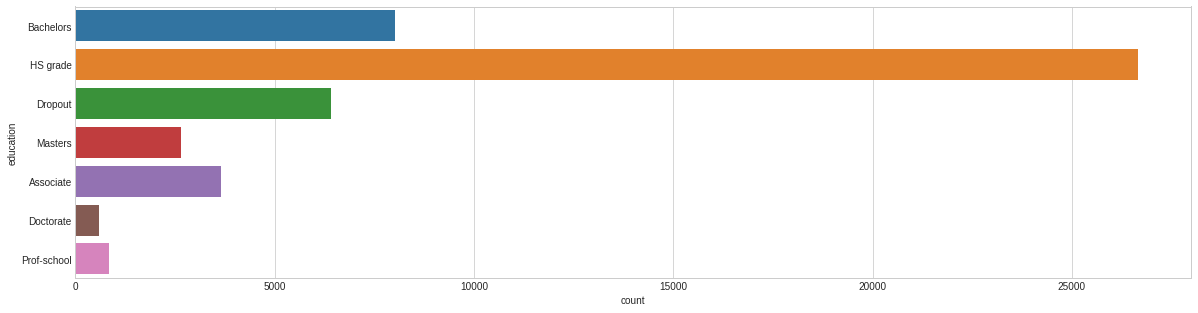

In [39]:
fig = plt.figure(figsize = (20, 5))
sns.countplot(y='education', data = dataset_bin);

# Feature: Marital Status

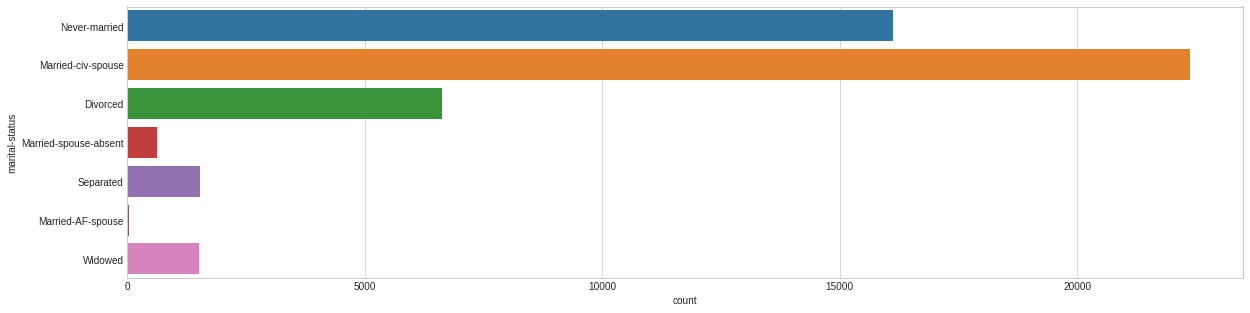

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(y='marital-status', data = dataset_raw);

In [41]:
dataset_raw.loc[dataset_raw['marital-status'] == 'Never-married', 'marital-status'] = 'Never-married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-civ-spouse', 'marital-status'] = 'Married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Married-AF-spouse', 'marital-status'] = 'Married'

dataset_raw.loc[dataset_raw['marital-status'] == 'Divorced', 'marital-status'] = 'Separated'
dataset_raw.loc[dataset_raw['marital-status'] == 'Separated', 'marital-status'] = 'Separated'

dataset_raw.loc[dataset_raw['marital-status'] == 'Married-spouse-absent', 'marital-status'] = 'Not married'
dataset_raw.loc[dataset_raw['marital-status'] == 'Widowed', 'marital-status'] = 'Widowed'

dataset_bin['marital-status'] = dataset_raw['marital-status']
dataset_con['marital-status'] = dataset_raw['marital-status']

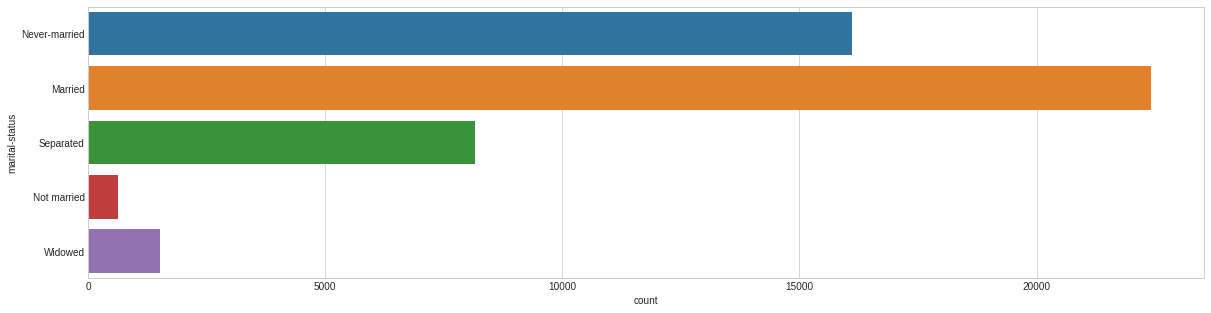

In [42]:
plt.figure(figsize = (20, 5))
sns.countplot(y = 'marital-status', data = dataset_bin);